# Section 1 - Observation Data
Make a plot of velocity and radius. 
First, we read the data file which is 'sofue.txt' in this case. The file contain three kinds of data; radius (kpc), rotation velocity (km/s), and velocity dispersion (km/s).

In [1]:
#impoty all library needed to make a plot
import numpy as np
import matplotlib.pyplot as plt

In [41]:
#read data from file, make sure that the data file is in the same directory with the pyhton file
data = np.loadtxt('sofue_full.txt') #add data here

r,v,disp_v = [],[],[]
r_max = 100 #kpc

#select data from certain radius
for i in range (len(data)):
    if data[i,0] < r_max:
        r.append(data[i,0])
        v.append(data[i,1])
        disp_v.append(data[i,2])
        
r=np.array(r)
v=np.array(v)
disp_v=np.array(disp_v)

<ipython-input-43-2a1aa2173090>:5: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,)


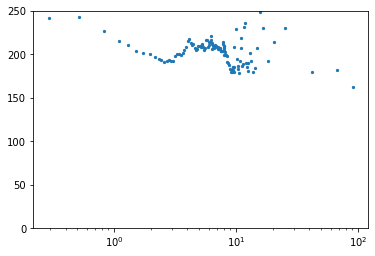

In [43]:
#making a scatter plot r vs v
plt.scatter((r),v, s=5)
#plt.plot((r),v)
plt.xscale('log')
plt.xlim(0,)
plt.ylim(0,250)
plt.show()


# Section 2 - Galaxy Rotation Curve Model
Next, we need to generate some galaxy rotation curve model to get the estimated parameters we need. We use three components of the galaxy; bulge, disk, and halo. Each of them will have an equation to describe the velocity in that region. 

In [4]:
#generate radius; used to generate velocity in all radius from model
r_last = r[len(r)-1]

print(r_last)
r_gen = np.arange(start=0.001, stop=r_last, step= 0.1) #unit in kpc

20.43


In [5]:
#unit converter

mass_sun = 1.9885e30 #https://nssdc.gsfc.nasa.gov/planetary/factsheet/sunfact.html
pc_m = 3.086e+16 
G = 6.67e-11 #in unit N kg-2 m2

In [6]:
#bulge velocity as function of radius
#see reference:https://arxiv.org/pdf/1211.4353.pdf

def Vbulge(radius):
    Mb = 9.5e9 #mass_sun
    bb = 0.23 #kpc
    
    Mb= Mb*mass_sun
    bb = bb * 1e3 *pc_m
    radius = radius * 1e3 * pc_m
    
    return (np.sqrt(G*Mb*radius**2*(radius**2+bb**2)**(-1.5)))/1000 #km/s

In [7]:
#calculate velocity bulge at all radius

Vb= []
for i in range(len(r_gen)):
    #print(i)
    Vel_bulge = Vbulge(r_gen[i])
    Vb.append(Vel_bulge)
    print(Vel_bulge)

1.8318573237443487
162.1002739513224
240.58629821084185
260.8644246976881
257.7976850560688
247.33079041480391
235.25253880262377
223.52609198770375
212.74894538620862
203.03217939295723
194.3188161114979
186.5017778402262
179.4676169054611
173.11184159097428
167.34321493678678
162.08385425793384
157.26787121918105
152.83965022783812
148.75218726524685
144.96563108635823
141.44605448129803
138.16443961763716
135.09584768726717
132.21874154064872
129.51443303907772
126.96663120913361
124.56107160181384
122.28521105821828
120.12797524874972
118.07954891677907
116.13120080426165
114.2751368580972
112.50437659639549
110.81264852443422
109.19430128879209
107.64422789082303
106.15780078335348
104.73081607534378
103.35944539011516
102.04019418059792
100.76986551312088
99.54552849983895
98.36449069703863
97.22427389857972
96.12259284559346
95.05733644918254
94.02655118535986
93.02842637329901
92.06128109111388
91.12355251942734
90.21378553319639
89.33062338766378
88.47279936573545
87.639129272

In [8]:
#disk velocity as function of radius
#see reference:https://arxiv.org/pdf/1211.4353.pdf

def Vdisk(radius):
    Md = 6.6e10 #mass_sun
    ad = 4.22
    bd = 0.292
    
    Md= Md*mass_sun
    ad = ad * 1e3 *pc_m
    bd = bd * 1e3 *pc_m
    radius = radius * 1e3 * pc_m
    
    return (np.sqrt(G*Md*radius**2*(radius**2+(ad+bd)**2)**(-1.5)))/1000 #km/s
    

    

In [9]:
#calculate disk Velocity at all radius

Vd= []
for i in range(len(r_gen)):
    #print(i)
    Vel_disk = Vdisk(r_gen[i])
    Vd.append(Vel_disk)
    print(Vel_disk)

0.05557072579920885
5.6105351614616685
11.15312027808107
16.671175472731687
22.152759040031043
27.586237207116508
32.96037749799535
38.264434830980505
43.48822898029322
48.62221229548663
53.65752685804932
58.586050550857834
63.40043181082643
68.09411311689718
72.66134352468777
77.09718078787179
81.39748379905839
85.55889623615087
89.57882241261898
93.45539640247407
97.18744554529052
100.77444943695231
104.21649548242385
107.51423203280012
110.66882005545307
113.6818841984586
116.55546401356497
119.29196600017649
121.89411703003304
124.3649196116662
126.70760935786846
128.92561493023635
131.02252065367477
133.00203192139284
134.86794344774123
136.6241103722423
138.27442217305557
139.82277931139586
141.2730724994315
142.62916446217193
143.89487404802517
145.07396253224724
146.17012195163161
147.1869653067539
148.12801846919345
148.99671363477967
149.79638416948865
150.5302607016604
151.20146832229435
151.81302476395217
152.36783943795743
152.86871321888466
153.31833887458384
153.71930204

In [10]:
#halo velocity
#see reference: https://academic.oup.com/pasj/article/64/4/75/2898274

def Vhalo(radius, rho1, h1): 
    X = radius/h1
    
    h1 = h1 * 1e3
    rho1 = rho1 * mass_sun
    radius = radius * 1e3 * pc_m
    
    Mh = 4*np.pi*rho1*h1**3*(np.log(1+X)-(X/(1+X)))
    
    return (np.sqrt(G*Mh/radius))/1000 #km/s
    
    

In [11]:
#calculate halo velocity at all radius

#this constant is given
rho = 0.02 #m_sun pc^-3
h = 10 #kpc

Vh= []
for i in range(len(r_gen)):
    #print(i)
    Vel_halo = Vhalo(r_gen[i],rho,h)
    Vh.append(Vel_halo)
    print(Vel_halo)

2.323826680476375
23.199710917021985
32.513528465917005
39.52929409206479
45.33178394409266
50.346457289795886
54.79373285892731
58.80577728260789
62.46947982118568
65.84572342486118
68.9792174734226
71.90399834730982
74.64672735933297
77.22877832647104
79.66761805239734
81.97775271726788
84.17139659241795
86.258956876818
88.24939310965014
90.15048881141662
91.96906031205265
93.7111197310601
95.38200390027282
96.98647758736666
98.52881705101632
100.01287834952595
101.44215369234355
102.81981831399476
104.14876976220829
105.43166105967777
106.67092887694865
107.86881761141
109.02740008277107
110.14859541349264
111.23418455256218
112.28582381486792
113.30505674050852
114.29332452439287
115.25197522332184
116.18227191293259
117.08539993872988
117.96247338241143
118.81454084588808
119.64259063984214
120.44755545083025
121.23031655021317
121.99170759926913
122.73251809731107
123.45349651331765
124.15535313620562
124.83876267433808
125.5043666309593
126.15277547894355
126.78457065537921
127.

In [12]:
#sum of three component (bulge, disk, halo)

Vtotal= []

for i in range(len(r_gen)):
    Vtotal.append(np.sqrt(Vb[i]**2 + Vd[i]**2 + Vh[i]**2))

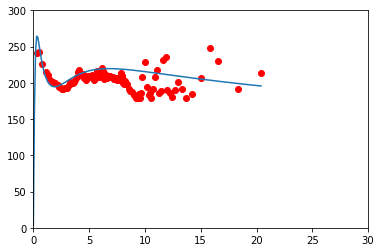

In [13]:
#make a plot for data (dots) and model (line)

plt.plot(r_gen,Vtotal)
plt.scatter(r,v, color="red")
#plt.xscale('log')
plt.ylim(0,300)
plt.xlim(0,30)
plt.show()

# Section 3 - Fitting
To get the correct parameters, we need to fit the model and the observation data. In this case, we use could use least-square method or MCMC method to do the fitting (choose one). Other fitting methods is also possible.

## Section 3.1 - Fitting using Least-square method
Skip this step if you want to use MCMC method. Continue to Section 3.2 directly. 

In [14]:
import scipy.optimize as optimization

def model(r, rho, h):
    
    v_bulge = Vbulge(r)
    v_disk = Vdisk(r)
    v_halo = Vhalo(r, rho, h)
    
    model = np.sqrt(v_bulge**2 + v_disk**2 + v_halo**2)
    return model

In [15]:
initial=[1.06e-2, 10.53]
print (optimization.curve_fit(model, r, v,initial,disp_v, maxfev=5000))
rho = optimization.curve_fit(model, r, v,initial,disp_v, maxfev=5000)[0][0] #retrive rho value from the fitting parameters
h = optimization.curve_fit(model, r, v,initial,disp_v, maxfev=5000)[0][1] #retrive h value from the fitting parameters
print ("rho = ", rho)
print ("h = ", h)

(array([0.04992477, 4.74678767]), array([[ 6.92276272e-05, -3.63524652e-03],
       [-3.63524652e-03,  1.91882183e-01]]))
rho =  0.04992477454869552
h =  4.746787670330414


<ipython-input-10-361138a524e4>:11: RuntimeWarning: invalid value encountered in log
  Mh = 4*np.pi*rho1*h1**3*(np.log(1+X)-(X/(1+X)))
<ipython-input-10-361138a524e4>:13: RuntimeWarning: invalid value encountered in sqrt
  return (np.sqrt(G*Mh/radius))/1000 #km/s


## Section 3.2 - Fitting Using MCMC
If you already do the fitting using Least-square method, skip this section and continue to the next section.

In [16]:
import emcee #you need to install this library manually if it not available in your system
print(emcee.__version__)

3.0.2


In [17]:
#prior

def log_prior(theta):
    rho, h = theta
    if rho > 0 and h > 0:
        return 0.0
    return -np.inf

In [18]:
#likelihood

def log_likelihood(theta, r, v, disp_v):
    rho, h = theta
    
    v_bulge = Vbulge(r)
    v_disk = Vdisk(r)
    v_halo = Vhalo(r, rho, h)
    
    model = np.sqrt(v_bulge**2 + v_disk**2 + v_halo**2)
    
    return -0.5 * np.sum((v - model) ** 2 / disp_v + np.log(disp_v))

#posterior
def log_probability(theta, r, v, disp_v):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, r, v, disp_v)

100%|██████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:34<00:00, 86.22it/s]


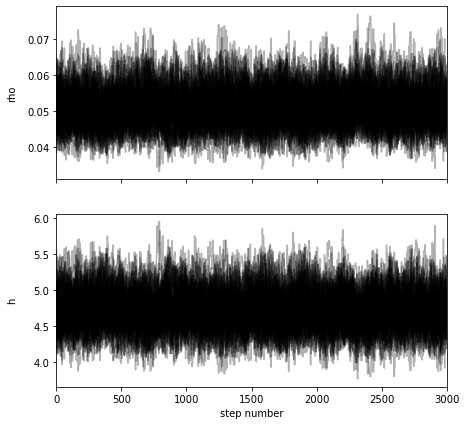

In [19]:
initial=[1.06e-2, 12.53] #initial theta for rho and h
pos = initial + 1e-4 * np.random.randn(50, 2)
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(r, v, disp_v))
pos,prob,state = sampler.run_mcmc(pos, 5000, progress=True)
sampler.reset()
sampler.run_mcmc(pos, 3000, progress=True)

fig, axes = plt.subplots(2, figsize=(7, 7), sharex=True)
samples = sampler.get_chain()
labels = ["rho", "h"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");


In [20]:
tau = sampler.get_autocorr_time()
print(tau)

[56.01671981 56.27324876]


In [21]:


flat_samples = sampler.get_chain(thin=15, flat=True) #discard=100, thin=15, flat=True
print(flat_samples.shape)


(10000, 2)


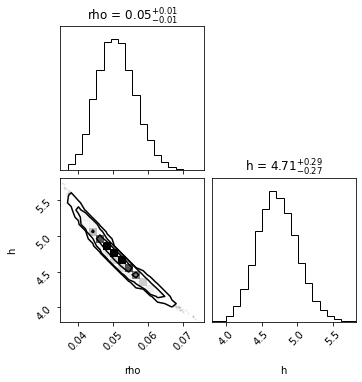

In [22]:
#plot corner 
import corner #you need to install this library manually if it not available in your system

fig = corner.corner(
    flat_samples, labels=labels,  levels=(0.68,0.95, 0.99), show_titles=True
);

In [23]:
#for showing the value of theta

from IPython.display import display, Math

for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Section 4 - Result 
In this section we show the rotation curve model using parameters we got from the fitting in the previous section. 

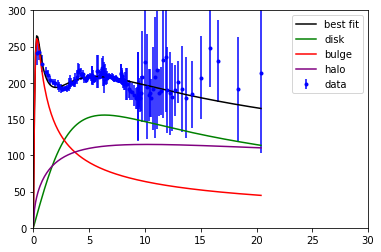

In [24]:
#result

#Change this value with the result from fitting process (Section 3.1 or 3.2)
rho = 0.051  #m_sun pc^-3 
h = 4.713 #kpc

Vh= []
for i in range(len(r_gen)):
    #print(i)
    Vel_halo = Vhalo(r_gen[i],rho,h)
    Vh.append(Vel_halo)
    #print(Vel_halo)
    
#sum of three component

Vtotal= []

for i in range(len(r_gen)):
    Vtotal.append(np.sqrt(Vb[i]**2 + Vd[i]**2 + Vh[i]**2))
    

#plt.scatter(r,v, color= "red")
#plt.title("Least square")
plt.errorbar(r, v, disp_v, fmt='.', label = 'data', color = "blue")
plt.plot(r_gen,Vtotal, color ="black", label = "best fit")
plt.plot(r_gen, Vd, color = "green", label = "disk")
plt.plot(r_gen, Vb, color = "red", label = "bulge")
plt.plot(r_gen, Vh, color = "purple", label = "halo")
plt.ylim(0,300)
plt.xlim(0,30)
plt.legend()
#plt.savefig('Curve_fit_ls.png') #to save the figure
plt.show()

# Section 5 - Calculate Dark Matter Mass
Using Mass equation given, we could estimate the dark matter mass at certain radius

In [25]:
#DM mass is estimated from halo mass
def DM_mass(radius, rho1, h1):
    X = radius/h1
    
    h1 = h1 * 1e3
    rho1 = rho1 * mass_sun
    #radius = radius * 1e3 * pc_m
    
    Mh = 4*np.pi*rho1*h1**3*(np.log(1+X)-(X/(1+X)))
    return Mh

In [26]:
Rh= 8.5 #kpc
D_M_mass =  DM_mass(Rh, rho, h)/ mass_sun
print ("Dark Matter Mass estimation = ", format(D_M_mass , "1.2e"),"Msun")

Dark Matter Mass estimation =  2.60e+10 Msun


# Section 6 - Burkert halo model
Same step as before, only change the Halo model using Burkert halo model.

In [27]:
#Burkert halo model

def Vhalo_b(radius, rho1, h1): 
    X = radius/h1
    
    h1 = h1 * 1e3
    rho1 = rho1 * mass_sun
    radius = radius * 1e3 * pc_m
    
    Mh = 2*np.pi*rho1*h1**3*(0.5*np.log(1+X**2)+np.log(1+X)-np.arctan(X))
    
    return (np.sqrt(G*Mh/radius))/1000 #km/s
    
  

In [28]:

def model(r, rho, h):
    
    v_bulge = Vbulge(r)
    v_disk = Vdisk(r)
    v_halo = Vhalo_b(r, rho, h)
    
    model = np.sqrt(v_bulge**2 + v_disk**2 + v_halo**2)
    return model

In [29]:
initial=[1.06e-2, 10.53]
print (optimization.curve_fit(model, r, v,initial,disp_v, maxfev=5000))
rho = optimization.curve_fit(model, r, v,initial,disp_v, maxfev=5000)[0][0] #retrive rho value from the fitting parameters
h = optimization.curve_fit(model, r, v,initial,disp_v, maxfev=5000)[0][1] #retrive h value from the fitting parameters
print ("rho = ", rho)
print ("h = ", h)

(array([0.24628574, 2.11272162]), array([[ 0.00056568, -0.00250768],
       [-0.00250768,  0.0113176 ]]))
rho =  0.24628574246306284
h =  2.112721624664873


In [30]:
#MCMC
#prior

def log_prior(theta):
    rho, h = theta
    if rho > 0 and h > 0:
        return 0.0
    return -np.inf

In [31]:
#likelihood

def log_likelihood(theta, r, v, disp_v):
    rho, h = theta
    
    v_bulge = Vbulge(r)
    v_disk = Vdisk(r)
    v_halo = Vhalo_b(r, rho, h)
    
    model = np.sqrt(v_bulge**2 + v_disk**2 + v_halo**2)
    
    return -0.5 * np.sum((v - model) ** 2 / disp_v + np.log(disp_v))

#posterior
def log_probability(theta, r, v, disp_v):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, r, v, disp_v)

100%|██████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:38<00:00, 77.23it/s]


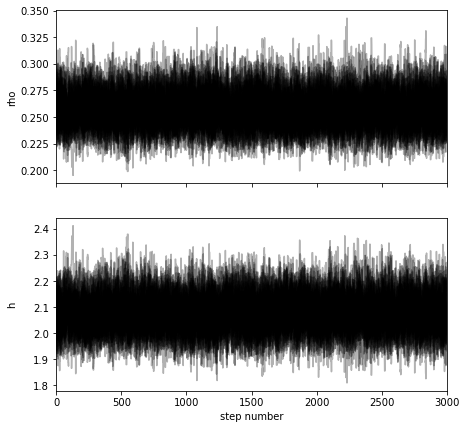

In [32]:
initial=[1.06e-2, 12.53] #initial theta for rho and h
pos = initial + 1e-4 * np.random.randn(50, 2)
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(r, v, disp_v))
pos,prob,state = sampler.run_mcmc(pos, 5000, progress=True)
sampler.reset()
sampler.run_mcmc(pos, 3000, progress=True)

fig, axes = plt.subplots(2, figsize=(7, 7), sharex=True)
samples = sampler.get_chain()
labels = ["rho", "h"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [33]:
tau = sampler.get_autocorr_time()
print(tau)

[31.66987159 31.50285445]


In [34]:
flat_samples = sampler.get_chain(thin=15, flat=True) #discard=100, thin=15, flat=True
print(flat_samples.shape)


(10000, 2)


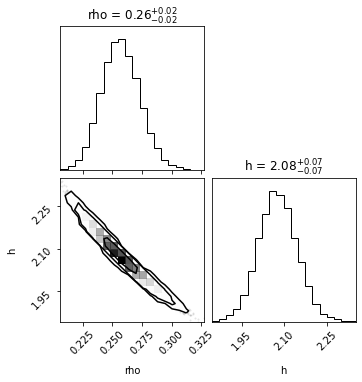

In [35]:
#plot corner 
import corner #you need to install this library manually if it not available in your system

fig = corner.corner(
    flat_samples, labels=labels,  levels=(0.68,0.95, 0.99), show_titles=True
);

In [36]:
#for showing the value of theta

from IPython.display import display, Math

for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

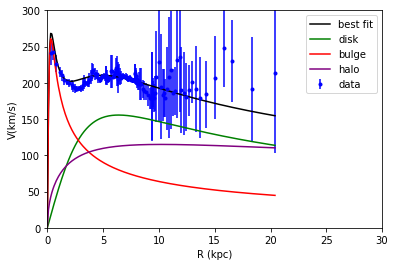

In [37]:
#result

#Change this value with the result from fitting process (Section 3.1 or 3.2)
rho_b =  0.257 #m_sun pc^-3 
h_b = 2.075 #kpc

Vh_b= []
for i in range(len(r_gen)):
    #print(i)
    Vel_halo = Vhalo(r_gen[i],rho_b,h_b)
    Vh_b.append(Vel_halo)
    #print(Vel_halo)
    
#sum of three component

Vtotal_b= []

for i in range(len(r_gen)):
    Vtotal_b.append(np.sqrt(Vb[i]**2 + Vd[i]**2 + Vh_b[i]**2))
    

#plt.scatter(r,v, color= "red")
#plt.title("Least square")
plt.errorbar(r, v, disp_v, fmt='.', label = 'data', color = "blue")
plt.plot(r_gen,Vtotal_b, color ="black", label = "best fit")
plt.plot(r_gen, Vd, color = "green", label = "disk")
plt.plot(r_gen, Vb, color = "red", label = "bulge")
plt.plot(r_gen, Vh, color = "purple", label = "halo")
plt.ylim(0,300)
plt.xlim(0,30)
plt.ylabel("V(km/s)")
plt.xlabel("R (kpc)")
plt.legend()
#plt.savefig('Curve_fit_ls.png') #to save the figure
plt.show()

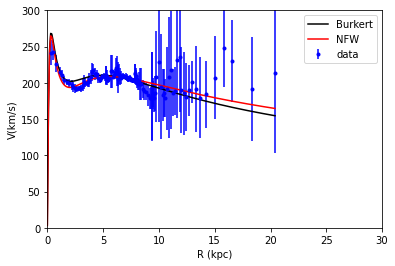

In [38]:
plt.errorbar(r, v, disp_v, fmt='.', label = 'data', color = "blue")
plt.plot(r_gen,Vtotal_b, color ="black", label ="Burkert")
plt.plot(r_gen,Vtotal, color ="red", label ="NFW")
plt.ylim(0,300)
plt.xlim(0,30)
plt.ylabel("V(km/s)")
plt.xlabel("R (kpc)")
#plt.savefig('Curve_fit_ls.png') #to save the figure
plt.legend()
plt.show()

In [39]:
#DM mass is estimated from halo mass Burkert
def DM_mass_b(radius, rho1, h1):
    X = radius/h1
    
    h1 = h1 * 1e3
    rho1 = rho1 * mass_sun
    #radius = radius * 1e3 * pc_m
    
    Mh = 2*np.pi*rho1*h1**3*(0.5*np.log(1+X**2)+np.log(1+X)-np.arctan(X))
    return Mh

In [40]:
Rh= 8.5 #kpc
D_M_mass_b =  DM_mass_b(Rh, rho, h)/ mass_sun
print ("Dark Matter Mass estimation = ", format(D_M_mass_b , "1.2e"),"Msun")

Dark Matter Mass estimation =  2.49e+10 Msun
